# Akademi X Flatiron School - Data Science & AI



                                 Movie-insights - Project

---

- **Student name :** Vilmarson JULES
- **Student pace :** self pace
- **Deadline Submission :** Jully 8, 2025 
- **Instructors' Name :** Wedter Jerome & Geovany Batista Polo Laguerre

- **Blog post URL :** [GitHub repository link](https://github.com/VilmarsonJ/JULES_Aviation_Risk_Dsc_Project_1)



# ***Movie-insights - Project***

---
---

## Overview
---

**The goal of this project is to identify the types of films are currently doing the best at the box office:**  
Throughout this  I explore and analyse those films, and Plenty of appropriate visualisations are used to make stakeholders understand the insights of the findings  much better. Moreover, three business recomandations concerning the films at the box office are provided to guide the decisions making of my company

***Then, this project is intended to :***
1. Identify films that are currently doing the best at the box office by :  
    - The Exploritory Data Analysis to Explicitly relate my findings to business needs by recommending actions that you think the business should take.
    - Data Visualisation to help my company's movie new head understand the much better the insights
2. Exhibit trends concernings the films by :
    - The statistic modeling of the data to predict models based on the data.
    

### Short Description :
    
This project is designed to point out the types of films are currently doing the best at the box office.Throughout this I explore and analyse those films, Plenty of appropriate visualisations are used and three business recomandations concerning the films at the box office are provided to make stakeholders understand the insights of the findings much better.

### Methods
---

To realize this project, the use of technical tools environnement like **Git, GitHUb, Git Bash, Jupyter Notebook** was a most. Moreover great features of *the SQL and the Python language* are used with a main focus on `Pandas, Matplotlib, seaborn, scipy, statsmodels and sqlite3` Packages.

Throughout this project, we leverages : 

- Descriptive statistics analysis as well as inferential Satistics to  achieve analysis
- Data cleaning, exploratory analysis using great features of `Pandas`
- Data Visualization with `Matplotlib and Seaborn` to extract salients insight for the company
- Diagnostic Analysis using great features of `Statsmodels and scipy`


## Business Problem

My campany gets inspired by the way that many companies dive into creating original videos content and wants to experiment this sector.  
Although they do not know anythings about this sector, they have decided to create a new movie studio in order to create or produce  
original video contents.   

Consequently, as a Data scienctist the compagny has charged me to explore :  
**What types of films are currently doing the best at the box office**.  
Then, I must certainlyn used my professional and scientific proficiencies to translate those findings into actionable and strategic insights so that the head of my company's new movie studio can leverage to what type of films to create.

## Business Understanding


This movie insights aims to support data-driven decision-making for my company which wants to experiment the sector of creating original video content.  
The core objective is to **identify what types of films are currently doing the best at the box office**.  

By understanding patterns in the rankings of best films at the box office, The head of the company's new movie studio can :  
- Identify wich films that seem more profitable for the company to create
- have a business roadmap to follow in order to beguin this meaningful adventure.


In [1]:
# Here I import all necessary libraries to start.
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandasql import sqldf
import numpy as np
import sqlite3
import gzip
import zipfile
import pathlib

## Data Understanding


Here we are going to get a meaningful overview of the Datasets that we actually used to achieve this wonderful work.  
To do so, we are going To examine :

- ### 1. The Data (Its different sources)
- ### 2. Overview of the IBM Database
- ### 3. Overview of the Csv Datasets

Consequently, I use some of the methods of `Pandas` DataFrame, like `.head()`,`shape`, ` .info()` etc to get overview of each dataset.   
And also I use `SQL` to interrogate my database so that I can get relavent overview of each table it contains.



### 1. The Data

Here we just show where our datasets come from and to see what type file are they.

    
The movie datasets used to achieve this project were collected from various locatioon as we see bellow :
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

From the various location showed above, all of the datasets are files with `csv` format, except for the IMDB which is located in a SQLite DataBase.

This picture bellow, show a global structure of th IMDB DataBase.

### 2. Overview of the IBM Database :

---

#### Here I'm going to exokore the IBM database :
1. To determine how many tables it contains
2. To explore the most relevant tables to make stackholders have a fundamental insights of the data.


In [2]:
# import zipfile, pathlib, pandas as pd, sqlite3, gzip

#  Unzip SQLite once (idempotent)
if not pathlib.Path("zippedData/im.db").is_file():
    with zipfile.ZipFile("zippedData/im.db.zip") as z:
        z.extractall("zippedData")

# 2️⃣  and here I Load the compressed flat files into pandas DataFrames
movie_gross  = pd.read_csv("zippedData/bom.movie_gross.csv.gz", compression="gzip")  # # tell pandas to decompress on the fly
tmdb_movie  = pd.read_csv("zippedData/tmdb.movies.csv.gz",    compression="gzip")
movie_info   = pd.read_csv("zippedData/rt.movie_info.tsv.gz",  sep="\t", compression="gzip")
movie_review = pd.read_csv("zippedData/rt.reviews.tsv.gz",     sep="\t",
                       compression="gzip", encoding="latin1", low_memory=False)
movie_budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", compression="gzip")

# I Connect to the SQLite DB (im.db) and list its tables
conn   = sqlite3.connect("zippedData/im.db")

As we can see below, the IMBB conrains fives tables. then, I will explore them to see what they contain.

In [3]:
# and here, I list all of the available tables of im.db
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables.head()


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings


In [4]:
# To select all the Data of the tables
q1 = """ SELECT * FROM movie_basics ; """
q2 = """ SELECT * FROM movie_ratings ; """

In [6]:
movie = pd.read_sql(q1, conn) # I store this data in a dataframe called movie
movie.head(10)  # Fetch only he first 10 observations

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [7]:
# Count frequencies of values in movie_id columns
movie[['movie_id']].value_counts()

movie_id 
tt9916754    1
tt2901864    1
tt2902126    1
tt2902032    1
tt2901984    1
            ..
tt5687280    1
tt5687282    1
tt5687328    1
tt5687334    1
tt0063540    1
Length: 146144, dtype: int64

In [8]:
# Dimension of our table
movie.shape

(146144, 6)

In [9]:
ratings = pd.read_sql(q2, conn) # I store this data in a dataframe called ratings
ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


AS we can see the **movie_basics** table represents the core movie info(title, year, genre),  
While the **movie_ratings** represent the average of rate and the number of votes provided by audiances or users. 

Moreover, each row of those two tables **represents informations about a particualr movie.**  
And we can observe that they contains a unique movie in each row identified by the movie_id.  
The table movie contains **146144 observations** about the movies while movie_ratings contains only **73856 observations.**

### As the goal is to find the best movie(films) at the box office, 
bellow I join those two tables in order to relate eeach movie to their respective rate.

And, finally we will see that we have created a dataframe called **movie_rate** that contains informations about both of the tables.  
And I will considere this table as I move on farther.

In [11]:
q_Join = """ SELECT movie_id, primary_title, start_year, runtime_minutes, genres,
            averagerating as rating, numvotes as number_votes
            FROM movie_basics
            JOIN movie_ratings
            USING(movie_id) ; """

movie_rate = pd.read_sql(q_Join, conn) # I store this data in a dataframe called movie_rate

# NOw, I display the movie_rate DataFrame(table)
movie_rate.head(10)

,movie_id,primary_title,start_year,runtime_minutes,genres,rating,number_votes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [13]:
# I count unique movie_id of movie_rate
movie_rate[['movie_id']].value_counts()

movie_id 
tt9916160    1
tt2413182    1
tt2418372    1
tt2418384    1
tt2418440    1
            ..
tt4861720    1
tt4861730    1
tt4862056    1
tt4862190    1
tt0063540    1
Length: 73856, dtype: int64

In [12]:
# THe dimension of my dataframe movie_rate
movie_rate.shape

(73856, 7)

In [13]:
#I look for the duplicate values in the movie_rate
movie_rate.isna().sum()

movie_id              0
primary_title         0
start_year            0
runtime_minutes    7620
genres              804
rating                0
number_votes          0
dtype: int64

In [14]:
#I lookat the frequency of each genre of the movie_rate

movie_rate[['genres']].value_counts()

genres                     
Drama                          11612
Documentary                    10313
Comedy                          5613
Horror                          2692
Comedy,Drama                    2617
                               ...  
Adventure,Animation,History        1
History,Romance,War                1
Comedy,Fantasy,Mystery             1
Comedy,Fantasy,Sport               1
Comedy,Documentary,Western         1
Length: 923, dtype: int64

#### Above, I explotred the IMDB and examine its the tables in order to get fundamental findings of the IMDB.  
---
Although it contains 5 tables, I only considere the tables ***movie_basics and movie_ratings*** that seem the most relevant for the analyses.  
Since the goal is to find the best movie(films) at the box office, I join them and store the result in the table ***movie_rate*** to deeper the analyses.


And now, this is the time to explore the CSV datasets to see how they can be meaningful

### 2. overview of the csv datasets
---

####  As we are going deeper in our Data undestanding, below I explore orther datasets besides tables of IMDB.   
Consequently, so much important fidings are exhibited bellow, so we will notice that :
1. **movie_gross** contains informations about revenus earning the films at the box office, that means this is the main source for box office revenue
2. **movie_budget**  tracks not only box office revenue but also the production budgets of each movie.

#### 1. movie_gross DataFrame

In [15]:
# I display the movie_gross dataFrame
movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [16]:
# I look at the studio column
movie_gross.studio

0               BV
1               BV
2               WB
3               WB
4             P/DW
           ...    
3382         Magn.
3383            FM
3384          Sony
3385    Synergetic
3386         Grav.
Name: studio, Length: 3387, dtype: object

In [17]:
# The dimension of the movie_budget
movie_gross.shape

(3387, 5)

In [18]:
# Identify missing values
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [19]:
# Identify duplicates values
movie_gross.duplicated().sum()

0

In [20]:
# Identify duplicates values
movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [21]:
# A brief summary statistics of numerical variables of movie_gross
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


#### 2. movie_budget DataFrame

In [22]:
# I display the movie_budget
movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [23]:
# The dimension of the movie_budget
movie_budget.shape

(5782, 6)

In [24]:
# Identify columns that contains missing values
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [25]:
# Identify columns that contains duplicate values
movie_budget.duplicated().sum()

0

In [26]:
# Identify the types of each columns(variables) movie_buget
movie_budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

#### As we have seen, I explore the tables meticulously to get quick findings from them, we can observe that :
**movie_gross** contains informations about revenus earning by the films, that means this table is the main source for box office revenue.  
Moreover, it shows that the average domestic gross earns by filmsis 2.874585e+07 $.

All of thoses tables shown above are really important for the analyses. So far, we had quick findings of them.  
Howerver, they should be prepared in order to do the most relevant analysis.  
So, in the next step, I will dive into the **Data Preparation** in order to prepare correctly the data for the analysis and results.

## Data Preparation
---
 Here we go !
 Now I'm about to prepare the data for analysis. As I've seen above, all the DataFrames, needs being cleaned. In fact, they contains 
- many columns with missing values
- columns with inapproriate datatypes
- columns with miswritten category, and so on.  

As a result, Through the process of preparing the Data, I'm going to do the :
 
 1. ### Data cleaning
     - #### Deal with columns
     - #### Handle missing values
 2. ### Feature Engineering
 3. ### Merging DataFrames

### 1. Data cleaning


#### Deal with columns properly 

Here we are going to focus on each columns in order to **keep** or to **drop** with the `.Drop()` method

Then, i'm going to :
- #### Drop less useful columns for this analysis
- #### Use appropriate name for each columns
- #### change the data type of columns if necessary

#### Missing values in the movie_gross table

In [27]:

# Step 0: Define the characters/strings that should be considered as missing
missing_values = ["", " ", "?", "NA", "N/A", "n/a", "na", "null", "None", 
                  "NONE", "Null", "unknown", "Unknown", "UNKNOWN", "UN", "—", "-"]

# Step 1: Replace all known "missing value" strings with np.nan in the whole DataFrame
movie_gross = movie_gross.replace(missing_values, np.nan)

# Step 2: Remove non-numeric characters ($, commas, spaces, etc.) from numerical columns
for col in ['domestic_gross', 'foreign_gross']:
    movie_gross[col] = movie_gross[col].astype(str).replace(r'[\$,]', '', regex=True)
    
    # Step 3: Convert to numeric
    movie_gross[col] = pd.to_numeric(movie_gross[col], errors='coerce')
    
    # Step 4: Fill missing values in numerical columns with their
    median_val = movie_gross[col].median(skipna=True)
    movie_gross[col].fillna(median_val, inplace=True)
    
# Step 2: deal with missing values in categorical variables
    
# Standardize missing-like strings and impute with mode
for col in ['title', 'studio'] :
    
    # Replace custom missing strings with np.nan
    movie_gross[col] = movie_gross[col].replace(missing_values , np.nan)
    
    # Fill missing values with the mode of the column
    mode_mgross = movie_gross[col].mode()[0]
    movie_gross[col] = movie_gross[col].fillna(mode_mgross)  
   
    
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### Missing values in the movie_rate table

In [28]:
# Dealing with missing values!

# Categorical variables

# first im going to identify missing value 
cols_mrate = ['primary_title', 'genres']
missing_mrate = ['UNK','Unknown','UNKNOWN','Unavailable','None', 'Unk',
                  'MISSING','Missing' ,'NONE','N/A','NaN', 'nan', '?' ]

# Standardize missing-like strings and impute with mode
for col in cols_mrate :   
    movie_rate[col] = movie_rate[col].replace(missing_mrate , np.nan)
    
    # Fill missing values with the mode of the column
    mode_mrate = movie_rate[col].mode()[0]
    movie_rate[col] = movie_rate[col].fillna(mode_mrate)
    
# numerical variables
# Convert to numeric, coerce invalid values to NaN
movie_rate['runtime_minutes'] = pd.to_numeric(movie_rate['runtime_minutes'], errors='coerce')

# Compute median (excluding NaN) # Fill NaNs with the median value
median_runtime = movie_rate['runtime_minutes'].median()
movie_rate['runtime_minutes'] =movie_rate['runtime_minutes'].fillna(median_runtime)

# Ensure type stays float.
movie_rate['runtime_minutes'] = movie_rate['runtime_minutes'].astype(float)

    
# To show the amount of missing values
movie_rate.isna().sum()

movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
rating             0
number_votes       0
dtype: int64

#### Missing values in the movie_budget table

In [29]:

# Step 0: Define known "missing value" indicators
missing_values = ["", " ", "?", "NA", "N/A", "n/a", "na", "null", "None", "NONE", "Null", 
                  "unknown", "Unknown", "UNKNOWN", "UN", "—", "-"]

# Step 1: Replace all known missing value indicators with NaN
movie_budget = movie_budget.replace(missing_values, np.nan)

# Step 2: Clean non-numeric characters ($, commas) from numeric columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    movie_budget[col] = movie_budget[col].astype(str).replace(r'[\$,]', '', regex=True)
    movie_budget[col] = pd.to_numeric(movie_budget[col], errors='coerce')
    
    # Fill missing values with median of each column
    median_val = movie_budget[col].median(skipna=True)
    movie_budget[col].fillna(median_val, inplace=True)
      

# movie_budget = movie_budget.dropna(subset=['movie'], axis = 1)
    
movie_budget.isna().sum()

id                   0
release_date         0
movie                2
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

#### Clean columns :
Here I clean columns' name of each table in order to standardized them for merging 

In [30]:
# I clean the titles

def clean_title(title):
    return (
        str(title)
        .lower()
        .strip()
        .replace(":", "")
        .replace("-", "")
        .replace("’", "")
        .replace("'", "")
        .replace(",", "")
    )

movie_rate['primary_title'] = movie_rate['primary_title'].apply(clean_title)
movie_budget['title_movie'] = movie_budget['movie'].apply(clean_title)
movie_gross['title'] = movie_gross['title'].apply(clean_title)


### 2. Feature Engineering

In this section, we apply some computation on some columns to make the datasets more appropriate for analysis

In [31]:
# Extract the first genre before the first comma to make it primary genre
movie_rate['primary_genre'] = movie_rate['genres'].str.split(',').str[0].str.strip().str.title()
movie_rate.head()

# Step 2: Create total_revenue as the sum of domestic and foreign gross
movie_gross['total_revenue'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross.head()

# formalize the date columns
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'] )
#movie_budget['release_day'] = movie_budget['release_date'].dt.day_name()
movie_budget['release_year'] = movie_budget['release_date'].dt.year
movie_budget['release_month'] = movie_budget['release_date'].dt.month

movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_movie,release_year,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,avatar,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,pirates of the caribbean on stranger tides,2011,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,dark phoenix,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,avengers age of ultron,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,star wars ep. viii the last jedi,2017,12


In [32]:
# i considere only the most relevant columns in the movie_table
movie_budget = movie_budget.loc[:, ['title_movie', 'production_budget','release_year', 'release_month']]

movie_budget.head()

,title_movie,production_budget,release_year,release_month
0,avatar,425000000,2009,12
1,pirates of the caribbean on stranger tides,410600000,2011,5
2,dark phoenix,350000000,2019,6
3,avengers age of ultron,330600000,2015,5
4,star wars ep. viii the last jedi,317000000,2017,12


### 3. Merging DataFrames

---

##### In this section I merge the well clean DataFrames so that I can move to the Analysis step. Thus, I will merge  : 

1. movie_rate and movie_gross Dataframes as rate_gross

2. movie_rate, movie_gross and movie_budget Dataframes as rate_gross_budget

3.  Feature Engineering merging tables




#### 1. Merging movie_rate and movie_gross

In [33]:
# I merge movie_gross with movie_rate table
rate_gross = pd.merge(movie_rate, movie_gross, how = 'inner', left_on = 'primary_title', right_on = 'title')
rate_gross.head() # Display the first 5 rows

,movie_id,primary_title,start_year,runtime_minutes,genres,rating,number_votes,primary_genre,title,studio,domestic_gross,foreign_gross,year,total_revenue
0,tt0315642,wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Action,wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0
1,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,Adventure,on the road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt4339118,on the road,2014,89.0,Drama,6.0,6,Drama,on the road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt5647250,on the road,2016,121.0,Drama,5.7,127,Drama,on the road,IFC,744000.0,8000000.0,2012,8744000.0
4,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Adventure,the secret life of walter mitty,Fox,58200000.0,129900000.0,2013,188100000.0


In [34]:
# Look at the shape of the table
rate_gross.shape

(3166, 14)

In [35]:
# made the columns of the table look more coherent

cols_to_keep =['movie_id', 'title',  'genres', 'primary_genre','studio','runtime_minutes', 'number_votes',
                'rating', 'domestic_gross', 'foreign_gross','total_revenue','year' ]

# I chose to keep the most relevant and appropriate columns
rate_gross = rate_gross.loc[:, cols_to_keep]
rate_gross.head() 

,movie_id,title,genres,primary_genre,studio,runtime_minutes,number_votes,rating,domestic_gross,foreign_gross,total_revenue,year
0,tt0315642,wazir,"Action,Crime,Drama",Action,Relbig.,103.0,15378,7.1,1100000.0,18700000.0,19800000.0,2016
1,tt0337692,on the road,"Adventure,Drama,Romance",Adventure,IFC,124.0,37886,6.1,744000.0,8000000.0,8744000.0,2012
2,tt4339118,on the road,Drama,Drama,IFC,89.0,6,6.0,744000.0,8000000.0,8744000.0,2012
3,tt5647250,on the road,Drama,Drama,IFC,121.0,127,5.7,744000.0,8000000.0,8744000.0,2012
4,tt0359950,the secret life of walter mitty,"Adventure,Comedy,Drama",Adventure,Fox,114.0,275300,7.3,58200000.0,129900000.0,188100000.0,2013


#### 2. Merging movie_rate, movie_gross and movie_budget

In [36]:
# I Merge movie_rate, movie_gross and movie_budget together

rate_gross_budget = pd.merge(rate_gross, movie_budget, how= 'inner', left_on = 'title', right_on = 'title_movie')
rate_gross_budget.head()

,movie_id,title,genres,primary_genre,studio,runtime_minutes,number_votes,rating,domestic_gross,foreign_gross,total_revenue,year,title_movie,production_budget,release_year,release_month
0,tt0337692,on the road,"Adventure,Drama,Romance",Adventure,IFC,124.0,37886,6.1,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3
1,tt4339118,on the road,Drama,Drama,IFC,89.0,6,6.0,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3
2,tt5647250,on the road,Drama,Drama,IFC,121.0,127,5.7,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3
3,tt0359950,the secret life of walter mitty,"Adventure,Comedy,Drama",Adventure,Fox,114.0,275300,7.3,58200000.0,129900000.0,188100000.0,2013,the secret life of walter mitty,91000000,2013,12
4,tt0365907,a walk among the tombstones,"Action,Crime,Drama",Action,Uni.,114.0,105116,6.5,26300000.0,26900000.0,53200000.0,2014,a walk among the tombstones,28000000,2014,9


#### 3. Feature Engineering the rate_gross_budget

In [42]:
# Step 1: Create total_revenue = domestic_gross + worldwide_gross

# Step 2: Compute profit = total_revenue - production_budget
rate_gross_budget['total_profit'] = rate_gross_budget['total_revenue'] - rate_gross_budget['production_budget']

# Step 3: Compute profit_rate = profit / total_revenue
# Avoid division by zero using np.where
rate_gross_budget['profit_rate'] = np.where(
   rate_gross_budget['total_revenue'] != 0,
    round(rate_gross_budget['total_profit'] /rate_gross_budget['total_revenue'], 2) ,
    0  # or 0 if you prefer 
)

rate_gross_budget.head()

,movie_id,title,genres,primary_genre,studio,runtime_minutes,number_votes,rating,domestic_gross,foreign_gross,total_revenue,year,title_movie,production_budget,release_year,release_month,total_profit,profit_rate
0,tt0337692,on the road,"Adventure,Drama,Romance",Adventure,IFC,124.0,37886,6.1,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3,-16256000.0,-1.86
1,tt4339118,on the road,Drama,Drama,IFC,89.0,6,6.0,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3,-16256000.0,-1.86
2,tt5647250,on the road,Drama,Drama,IFC,121.0,127,5.7,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3,-16256000.0,-1.86
3,tt0359950,the secret life of walter mitty,"Adventure,Comedy,Drama",Adventure,Fox,114.0,275300,7.3,58200000.0,129900000.0,188100000.0,2013,the secret life of walter mitty,91000000,2013,12,97100000.0,0.52
4,tt0365907,a walk among the tombstones,"Action,Crime,Drama",Action,Uni.,114.0,105116,6.5,26300000.0,26900000.0,53200000.0,2014,a walk among the tombstones,28000000,2014,9,25200000.0,0.47


In [44]:
# The shape of the DataBase
rate_gross_budget.shape

(1482, 18)

In [43]:
# I only considere the most relevant columns from my rate_gross_budget table to make the analysis

Relevant_cols = ['movie_id', 'title', 'primary_genre','studio','runtime_minutes','number_votes','rating',
                 'production_budget', 'domestic_gross', 'foreign_gross', 'total_revenue','total_profit', 
                 'profit_rate','year','release_year','release_month']

# We can see that, the rate_gross_budget only contains relevant columns above
rate_gross_budget = rate_gross_budget.loc[:, Relevant_cols]
rate_gross_budget.head()

,movie_id,title,primary_genre,studio,runtime_minutes,number_votes,rating,production_budget,domestic_gross,foreign_gross,total_revenue,total_profit,profit_rate,year,release_year,release_month
0,tt0337692,on the road,Adventure,IFC,124.0,37886,6.1,25000000,744000.0,8000000.0,8744000.0,-16256000.0,-1.86,2012,2013,3
1,tt4339118,on the road,Drama,IFC,89.0,6,6.0,25000000,744000.0,8000000.0,8744000.0,-16256000.0,-1.86,2012,2013,3
2,tt5647250,on the road,Drama,IFC,121.0,127,5.7,25000000,744000.0,8000000.0,8744000.0,-16256000.0,-1.86,2012,2013,3
3,tt0359950,the secret life of walter mitty,Adventure,Fox,114.0,275300,7.3,91000000,58200000.0,129900000.0,188100000.0,97100000.0,0.52,2013,2013,12
4,tt0365907,a walk among the tombstones,Action,Uni.,114.0,105116,6.5,28000000,26300000.0,26900000.0,53200000.0,25200000.0,0.47,2014,2014,9


Above We prepared our Data for analysis by following rigous steps and methods.  
As our Datasets are Realy Cleaned and well Prepared, now we can move on the steps of **Analysis and Results**

## Analysis and Results

In this meaningful section we are going to analyse our prepared Data to :  
Reveal precious insights for the company's head
Find hiden trend behind the movies at the Box office.  
Thus, to achieve this significant step I have done The :
### 1. Descriptive Analysis   
- To see and examine what actually happened  

### 2. Diagnostic Analysis 
- Whhy did things happenend like that  


### 1. Descriptive Analysis
In this step of analysis I retrieve and anlyse what actully happened concernings movie at the Box office.  
Thus, I use Descriptive statistics to analyse the Datasets and show what it really was about.
Throughout this step of analysis, great feature of SQL are used to achieve this step.  

We leverage the `sqldf` Packages to query the `DataFrames` in order to reaveal hiden informations on table format.  
Moreover we used great features of `Matplotlib` and `Seaborn` to retrieve insights through visualisation.

In [44]:
# I used Sqldf to querying my Dataframes with SQL
pysqldf = lambda q : sqldf(q, globals()) 

## Analysing genres



### Top 10 most repeated primary genre of movies.

Bellow we can see the Top 10 most repeated primary genre of movies at the Box Offices.
With a Dominance of **ACTION and DRAMA**. We can Observe that Primary genres of 409 movies are actions, whereas the tenth most repeated primary genre of movies is **ANIMATION.**

So far, the head of your company's new movie studio can start to think that most genres of movies that he will be creating, would probably be action and Drama. 


In [45]:
# Top 10 most repeated primary genre of movies.
q1 = """ SELECT primary_genre, count(movie_id) as total_movie
        FROM rate_gross_budget
        GROUP BY primary_genre
        ORDER BY total_movie DESC
        LImit 10; """

top_10_genres_movie = pysqldf(q1)
top_10_genres_movie

,primary_genre,total_movie
0,Action,409
1,Drama,302
2,Comedy,272
3,Adventure,145
4,Biography,113
5,Horror,80
6,Crime,74
7,Documentary,47
8,Thriller,13
9,Animation,9


### Top 10 of the most primary genre of movies with highest profit rate

Although most movies' genres are ACTION and DRAMA, But they are not the genres with highest profit rate in average.  
The graph bellow show the top 10 genres of movies that generate the highest profit rate in average.  **SCI-FI and MYSTERY** genres brings a highest mean of profit rate with a rate 0f 80%  about. Whereas **ACTION** brings only about a profit rate of 30% about.

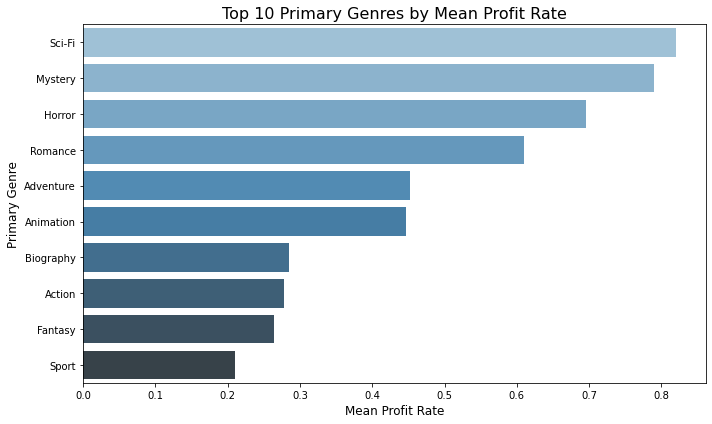

In [47]:
# Calculate mean profit by primary genre
genre_profit_rate = (
    rate_gross_budget.groupby('primary_genre')['profit_rate']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=genre_profit_rate, y='primary_genre', x='profit_rate', palette='Blues_d')
plt.title('Top 10 Primary Genres by Mean Profit Rate', fontsize=16)
plt.xlabel('Mean Profit Rate', fontsize=12)
plt.ylabel('Primary Genre', fontsize=12)
plt.tight_layout()
plt.show()


### Top 10 genres of movies with highest ratings by audiances.  

We can observe that, **SPORT and Mystery ** represent the genre that is most loved by audiances or spectators, with a mean rating of 79% and 75% resoectively.  whereas, **DRAMA and ADVANTURE** represent the nineth and tenth genres with highest rating.

That can be understood, because almost everyone loves sport, this can explain why sport ranks first in this case. We should neglect also that, among the top 10, the mean rating of each other is so close. 

In [49]:
# Top 10 most repeated primary genre of movies.
q2 = """ SELECT primary_genre, round(Avg(rating), 2) as mean_rating
        FROM rate_gross_budget
        GROUP BY primary_genre
        ORDER BY  mean_rating DESC
        LImit 10; """

top_10_genres_movie = pysqldf(q2)
top_10_genres_movie

,primary_genre,mean_rating
0,Sport,7.90
1,Mystery,7.50
2,Music,7.20
3,Romance,7.10
4,Animation,7.03
5,Biography,6.97
6,Documentary,6.94
7,Crime,6.61
8,Drama,6.56
9,Adventure,6.50


### The Studio variable(columns)

### Top 10 studio that has created the most movies

Below, we observe that most of the movies are created by **Uni.** studio, with a total **156 movies created**, after becomes the **Fox** studio. Howerver, at the bottom of the top 10, there are Focus studio with 51 movies created.

We extract these meaningfull information, so that the head of the new company's movie studio should really know the ones who are currently ruling this sector. Besides, We already observe that what kinds of opponents our studio will face up to.


In [92]:
# Top 10 of The most popular movie studio

q3 = """ SELECT studio, count('movie_id') as total_movie
        FROM rate_gross_budget
        GROUP BY studio
        ORDER BY  total_movie DESC
        LImit 10; """

top_10_genres_movie = pysqldf(q3)
top_10_genres_movie

,studio,total_movie
0,Uni.,156
1,Fox,130
2,WB,119
3,Par.,87
4,BV,86
5,Sony,81
6,LGF,69
7,FoxS,64
8,WB (NL),51
9,Focus,51


### Top 10 studio that generate the highest profit in total

To go deeper, bellow we visuliaze the studios that earned the highest profit in total. And, as we can see the top 3 of studios, **BV, Uni. and Fox**,  that has created the most movies, earned the highest profit over the movies they created.  


Consequently, those movies studios represents real opponents that our movie Studio will encounter in the Future.

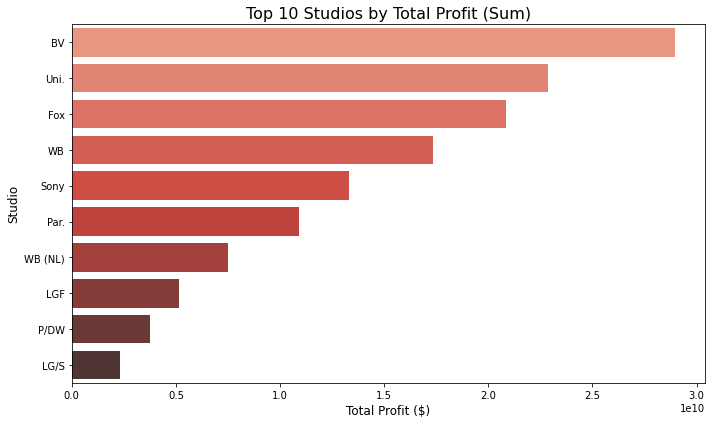

In [67]:
# Group by studio, then sum profit and sort
studio_profit = (
    rate_gross_budget.groupby('studio')['total_profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot: horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=studio_profit, y='studio', x='total_profit', palette='Reds_d' )
plt.title('Top 10 Studios by Total Profit (Sum)', fontsize=16)
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.tight_layout()
plt.show()
 #  'viridis'

### The movie columns

Below we try to analyse some distinct movies. And we can observe that, about three movies genereted a profit of 100 %. Moreover, each movie of there more than 20 movies that generated a profit over 97 %. 

In [52]:
q4 = """ SELECT title, profit_rate, total_profit, primary_genre, rating, year
        FROM rate_gross_budget  
        ORDER BY profit_rate DESC
        LIMIT 20 ; """

top_10_movie_profit_rate = pysqldf(q4)
top_10_movie_profit_rate.head(10)

,title,profit_rate,total_profit,primary_genre,rating,year
0,tiny furniture,1.00,19042000.0,Comedy,6.2,2010
1,the gallows,1.00,42900000.0,Horror,4.2,2015
2,a ghost story,1.00,20200000.0,Drama,6.8,2017
3,snitch,0.99,60750000.0,Action,6.5,2013
4,the devil inside,0.99,100800000.0,Horror,4.2,2012
5,your sisters sister,0.99,20180000.0,Comedy,6.7,2012
6,sound of my voice,0.99,18973000.0,Drama,6.6,2012
7,compliance,0.99,18749000.0,Biography,6.4,2012
8,the canyons,0.99,18506800.0,Drama,3.8,2013
9,the karate kid,0.98,351100000.0,Action,6.2,2010


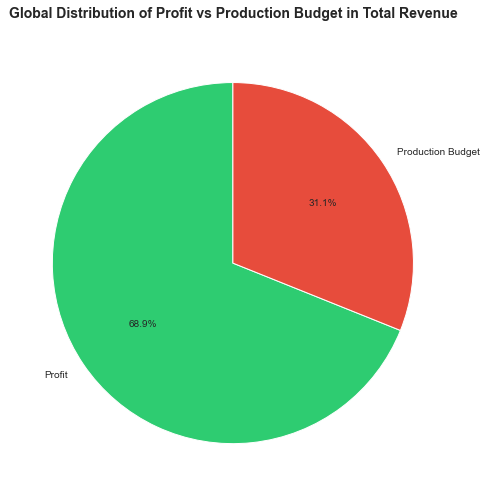

In [86]:
import matplotlib.pyplot as plt

# Calculate total values across the dataset
total_revenue_all = rate_gross_budget['total_revenue'].sum()
total_budget_all = rate_gross_budget['production_budget'].sum()
total_profit_all = total_revenue_all - total_budget_all  # or sum of total_profit column

# Prepare data for pie chart
labels = ['Profit', 'Production Budget']
sizes = [total_profit_all, total_budget_all]
colors = ['#2ECC71', '#E74C3C']  # green for profit, red for budget

# Plot
plt.figure(figsize=(7,7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title('Global Distribution of Profit vs Production Budget in Total Revenue', fontsize=14, weight='bold', pad=20)
plt.tight_layout()
plt.show()


### Revenue Composition Analysis: Profit vs. Production Budget

I included this analysis to understand the composition of total movie revenues, specifically how much is absorbed by production costs versus how much remains as profit.
In the movie industry, this ratio is a critical measure of financial efficiency — it shows how well studios convert their investments (budgets) into returns (profits).


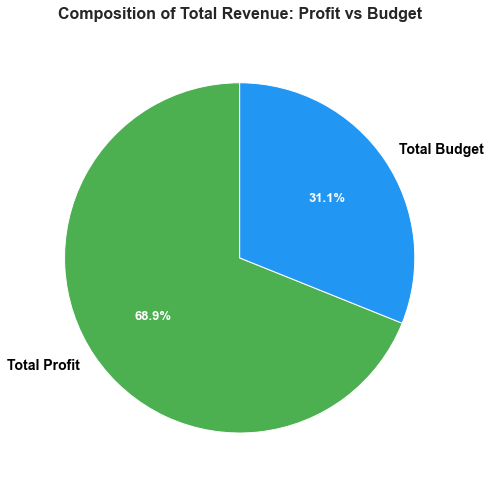

In [87]:
# Calculate totals
total_budget = rate_gross_budget['production_budget'].sum()
total_profit = rate_gross_budget['total_profit'].sum()

# Prepare data
values = [total_profit, total_budget]
labels = ['Total Profit', 'Total Budget']
colors = ['#4CAF50', '#2196F3']  # Elegant green & blue

# Create pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12, 'color': 'black'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Beautify labels
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.title('Composition of Total Revenue: Profit vs Budget', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


Analysis (based on your data)
From the aggregated dataset:

Profit accounts for 68.9% of the total revenue.

Production budget represents 31.1% of the total revenue.

This means that, globally, movies in this dataset have generated more than twice the revenue beyond their initial budgets.
Such a high profit share indicates a generally profitable industry segment during the period covered, although it does not account for other costs like marketing, distribution, or taxes, which could lower net profits in reality.



The fact that profits outweigh budgets by this margin suggests that, on average, studios have been able to leverage relatively modest production costs to achieve substantial returns.
This could indicate:

Efficient budget allocation

High market demand for certain films

Strong distribution and box office performance

However, it’s worth noting that individual movie performance can vary widely — this global ratio hides the presence of flops and mega-hits.

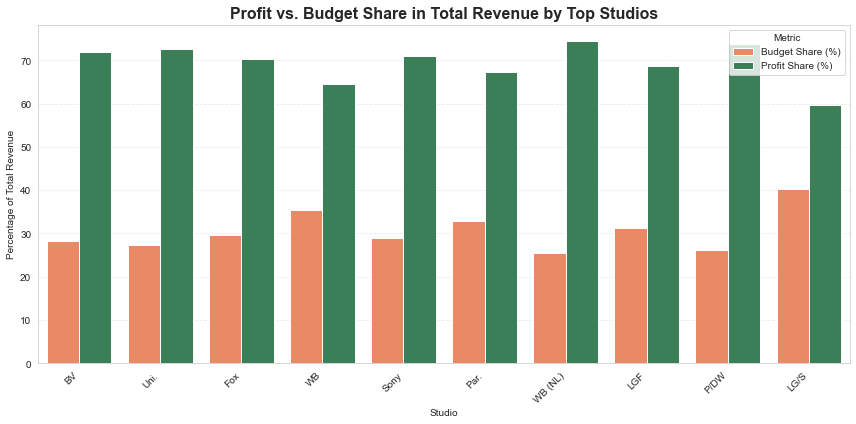

In [89]:
# Aggregate revenue, budget, and profit per studio
studio_summary = (
    rate_gross_budget
    .groupby('studio')
    .agg({
        'total_revenue': 'sum',
        'production_budget': 'sum',
        'total_profit': 'sum'
    })
    .reset_index()
)

# Calculate % share of budget and profit in total revenue
studio_summary['budget_pct'] = (studio_summary['production_budget'] / studio_summary['total_revenue']) * 100
studio_summary['profit_pct'] = (studio_summary['total_profit'] / studio_summary['total_revenue']) * 100

# Keep only top 10 studios by revenue for better visualization
top_studios_pct = studio_summary.sort_values('total_revenue', ascending=False).head(10)

# Prepare data for plotting
studio_plot_data = top_studios_pct.melt(
    id_vars='studio',
    value_vars=['budget_pct', 'profit_pct'],
    var_name='Type',
    value_name='Percentage'
)

# Beautify type labels
studio_plot_data['Type'] = studio_plot_data['Type'].map({
    'budget_pct': 'Budget Share (%)',
    'profit_pct': 'Profit Share (%)'
})

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=studio_plot_data,
    x='studio',
    y='Percentage',
    hue='Type',
    palette=['#FF7F50', '#2E8B57']  # Coral for budget, SeaGreen for profit
)

plt.title('Profit vs. Budget Share in Total Revenue by Top Studios', fontsize=16, fontweight='bold')
plt.ylabel('Percentage of Total Revenue')
plt.xlabel('Studio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


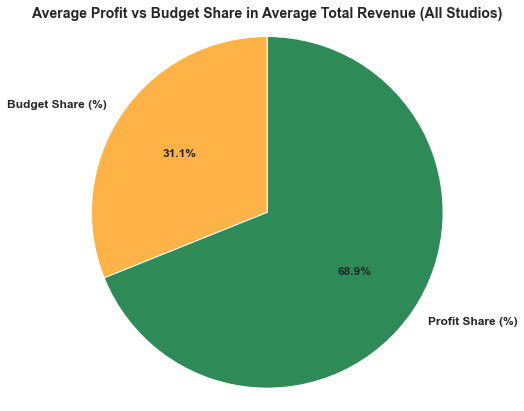

In [90]:
# Step 1: Aggregate revenue, budget, and profit per studio
studio_summary = (
    rate_gross_budget
    .groupby('studio')
    .agg({
        'total_revenue': 'sum',
        'production_budget': 'sum',
        'total_profit': 'sum'
    })
    .reset_index()
)

# Step 2: Compute averages
avg_revenue = studio_summary['total_revenue'].mean()
avg_budget = studio_summary['production_budget'].mean()
avg_profit = studio_summary['total_profit'].mean()

# Step 3: Compute percentages of budget and profit in average revenue
budget_pct = (avg_budget / avg_revenue) * 100
profit_pct = (avg_profit / avg_revenue) * 100

# Step 4: Prepare data for pie chart
labels = ['Budget Share (%)', 'Profit Share (%)']
sizes = [budget_pct, profit_pct]
colors = ['#FFB347', '#2E8B57']  # Warm orange for budget, SeaGreen for profit

# Step 5: Plot pie chart
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

plt.title('Average Profit vs Budget Share in Average Total Revenue (All Studios)',
          fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()


## Movie Count by Release Month (Seasonality Check)

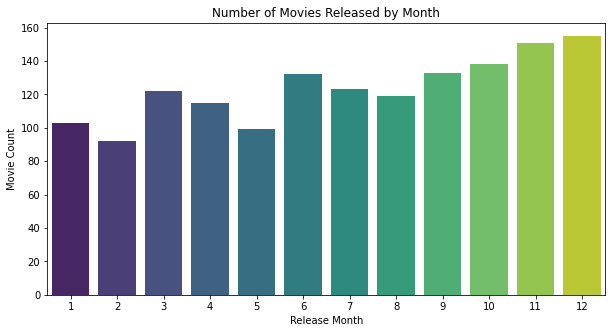

In [64]:
monthly_counts = rate_gross_budget.groupby('release_month').size().reset_index(name='movie_count')

plt.figure(figsize=(10,5))
sns.barplot(data=monthly_counts, x='release_month', y='movie_count', palette='viridis')

plt.title('Number of Movies Released by Month')
plt.xlabel('Release Month')
plt.ylabel('Movie Count')
plt.show()


### Movie release per year

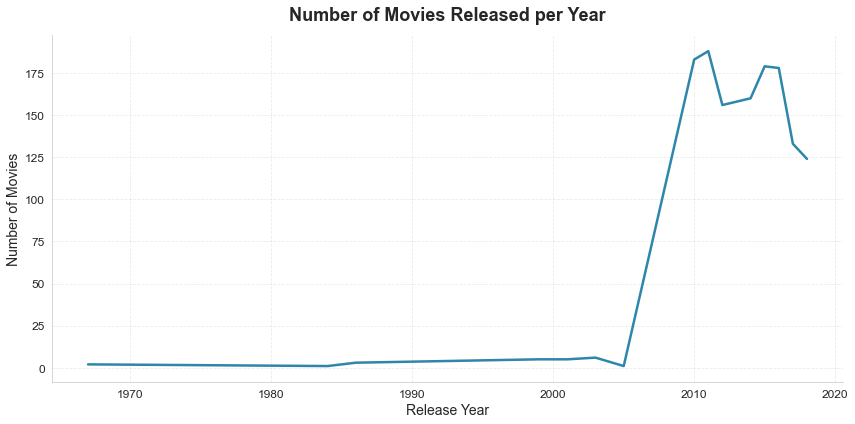

In [79]:
# Movie release per year
movie_count_per_year = (
    rate_gross_budget['release_year']
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'release_year', 'release_year': 'movie_count'})
)
# Plot the chart
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(
    data=movie_count_per_year,
    x='release_year',
    y='movie_count',
    color='#2E86AB',  # deep blue
    linewidth=2.5
)
plt.title('Number of Movies Released per Year', fontsize=18, weight='bold', pad=15)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
sns.despine()
plt.tight_layout()
plt.show()

##  Evolution of Revenue, Profit, and Budget trend Over the Years

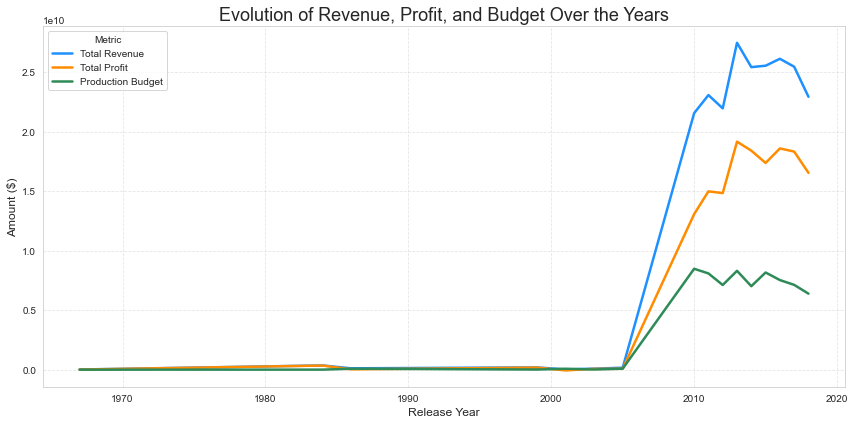

In [83]:
# Aggregate revenue, profit, and production budget by release year
yearly_finance = (
    rate_gross_budget.groupby('release_year')[['total_revenue', 'total_profit', 'production_budget']]
    .sum()
    .reset_index()
)
# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_finance, x='release_year', y='total_revenue', label='Total Revenue', color='dodgerblue', linewidth=2.5)
sns.lineplot(data=yearly_finance, x='release_year', y='total_profit', label='Total Profit', color='darkorange', linewidth=2.5)
sns.lineplot(data=yearly_finance, x='release_year', y='production_budget', label='Production Budget', color='seagreen', linewidth=2.5)

plt.title('Evolution of Revenue, Profit, and Budget Over the Years', fontsize=18)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


### 2. Average Revenue and Profit per Movie Over Years

### 2. Diagnostic Analysis

In this section of Analysis, we are going to analyse why did things like thta. To do so, we are going to do

#### - Correlation Analysis

#### - Hypothesis testing

### - Correlation Analysis

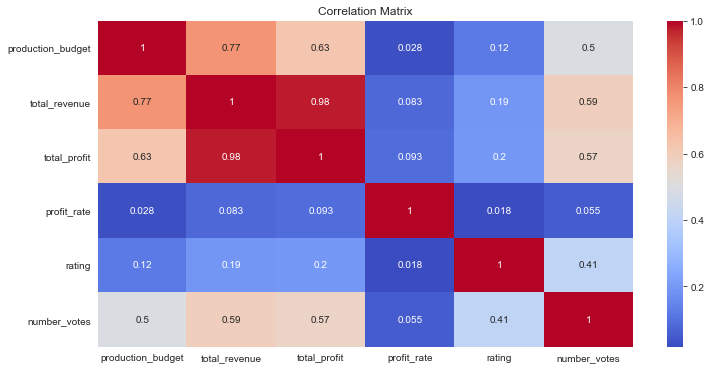

In [84]:
# Numericals columns to examine correlations.
corr_vars = ['production_budget', 'total_revenue', 'total_profit', 'profit_rate', 'rating', 'number_votes']
corr = rate_gross_budget[corr_vars].corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Scatter Plot Budget vs Revenue (with regression line)

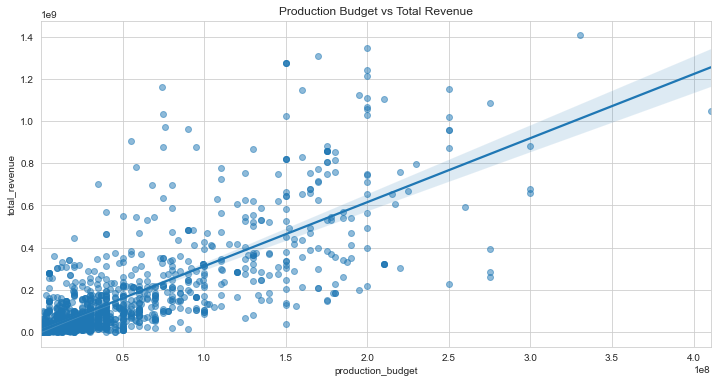

In [85]:
plt.figure(figsize=(12,6))
sns.regplot(data=rate_gross_budget, x='production_budget', y='total_revenue', scatter_kws={'alpha':0.5})
plt.title('Production Budget vs Total Revenue')
plt.show()


### Statistical Test: Are revenues significantly different between genres?

### ANOVA Test to Compare Group Means: Introduction and Procedure

### 1. Context and Objective
Our goal is to determine whether there are statistically significant differences in the average total revenue among the top 10 movie genres and in the average total profit among the top 10 movie studios.

Why do this?
Understanding if certain genres or studios systematically perform better financially is crucial for guiding the new movie studio’s strategic focus.

Hypotheses Restated:
Null Hypothesis (H₀): All top 10 genres have the same mean total revenue.

Alternative Hypothesis (H₁): At least one genre’s mean total revenue differs from the others.

Null Hypothesis (H₀):
The mean total revenue (or total profit) is the same across all groups (genres or studios).  

Alternative Hypothesis (H₁):
At least one group mean is different.

 Decision Rule
Choose a significance level (α), commonly 0.05.

Calculate the F-statistic and the corresponding p-value using ANOVA.

If p-value ≤ α, reject the null hypothesis 
𝐻
0
H 
0
​
 , meaning there is enough evidence that at least one group mean differs significantly.

If p-value > α, fail to reject 
𝐻
0
H 
0
​
 , meaning no statistically significant difference in means is detected.



In [120]:
import scipy.stats as stats

# Get revenue by genre as list of arrays
revenue_by_genre = [group['total_revenue'].values for name, group in rate_gross_budget.groupby('primary_genre')]

# ANOVA test (if normality and variance assumptions met)
f_stat, p_value = stats.f_oneway(*revenue_by_genre)

print(f"ANOVA test result: F = {f_stat:.3f}, p = {p_value:.3e}")


ANOVA test result: F = 18.922, p = 1.831e-49


In [127]:
# Get top 10 genres by count of movies
top_10_genres = rate_gross_budget['primary_genre'].value_counts().head(10).index.tolist()

# Filter dataset for top 10 genres only
top_genres_data = rate_gross_budget[rate_gross_budget['primary_genre'].isin(top_10_genres)]

# Prepare revenue lists by genre for ANOVA
revenue_by_genre_top10 = [group['total_revenue'].values for name, group in top_genres_data.groupby('primary_genre')]

# ANOVA for total revenue by top 10 genres
f_stat_genre, p_value_genre = stats.f_oneway(*revenue_by_genre_top10)
print(f"ANOVA test for Total Revenue by Top 10 Genres: F = {f_stat_genre:.3f}, p = {p_value_genre:.3e}")


ANOVA test for Total Revenue by Top 10 Genres: F = 32.749, p = 9.581e-53


Analysis:
The very large F-statistic indicates that the variation between the genre group means is much greater than the variation within each genre group.

The extremely small p-value (far below the typical 0.05 significance level) means we have overwhelming statistical evidence to reject the null hypothesis.

Business Implication:
There is a statistically significant difference in the average total revenue generated by different genres. This confirms that not all movie genres are equally profitable at the box office.

This finding is valuable for the new movie studio because:

They should focus their production on genres that historically generate higher revenues to maximize financial success.

Conversely, some genres might be less lucrative or more niche and may require more careful budgeting or marketing strategies.

Hypotheses Restated:
Null Hypothesis (H₀): All top 10 studios have the same mean total profit.

Alternative Hypothesis (H₁): At least one studio’s mean total profit is different from the others.

In [122]:
# Get top 10 studios by count of movies
top_10_studios = rate_gross_budget['studio'].value_counts().head(10).index.tolist()

# Filter dataset for top 10 studios only
top_studios_data = rate_gross_budget[rate_gross_budget['studio'].isin(top_10_studios)]

# Prepare total_profit lists by studio for ANOVA
profit_by_studio_top10 = [group['total_profit'].values for name, group in top_studios_data.groupby('studio')]

# ANOVA for total profit by top 10 studios
f_stat_studio, p_value_studio = stats.f_oneway(*profit_by_studio_top10)
print(f"ANOVA test for Total Profit by Top 10 Studios: F = {f_stat_studio:.3f}, p = {p_value_studio:.3e}")

ANOVA test for Total Profit by Top 10 Studios: F = 14.544, p = 4.028e-22


Analysis:
The F-statistic of 14.544 indicates that the variance of total profits between studios is significantly larger than the variance within each studio group.

The p-value is far below the conventional threshold of 0.05, allowing us to reject the null hypothesis with very strong confidence.

Business Implication:
There is clear statistical evidence that average total profit varies significantly between the top studios. This means that some studios consistently generate higher profits than others, which is a critical insight for:

The new movie studio to study and possibly emulate the practices of higher-profit studios.

Making decisions about potential partnerships, investments, or strategic hires based on studio performance.

Allocating resources efficiently by understanding studio-level factors affecting profitability.

Ok, great. now, i would like you to give me a pie chart that show informations about total_profit and budget.( I mean the pie chart should show how many percent the profit represent in the total revenu and how many percent budget represents) do a global pie chart for all budget and profit.

### Business Recommendation 1

### Business Recommendation 2

### Business Recommendation 3

## Conclusion

### Next Steps